<a href="https://colab.research.google.com/github/bluesky0960/AI_Study/blob/master/AutoEncoder_Conv(TensorFlow_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더 (TensorFlow 2)
텐서플로우 2에서 제공하는 고수준 API인 케라스를 이용해, 오토인코더(autoencoder)를 구현한다.
* Google Colab 환경에서 사용하는 경우에  초점을 맞춤.
* 텐서플로우 2
* 텐서플로우 2 내장 케라스 기준

참고문헌
* [TensorFlow 소개](https://www.tensorflow.org/learn)
* [TensorFlow > 학습 > TensorFlow Core > 가이드 > 케라스: 빠르게 훑어보기](https://www.tensorflow.org/guide/keras/overview)
* [Deep Learning with Python, by Francois Chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)


주의사항
* Colab에서 코드에 이상이 없음에도 불구하고 결과가 제대로 나오지 않을 경우, '런타임 다시 시작...'을 해보도록 한다.'


## Deep Neural Network 기초
다음 비디오를 보고 심층신경망(deep neural network) 기반 딥러닝 기법은 이해하도록 한다.
* [신경망이란 무엇인가? | 1장.딥러닝에 관하여 (3Blue1Brown)](https://youtu.be/aircAruvnKk)
* [경사 하강, 신경 네트워크가 학습하는 방법 | 심층 학습, 2장 (3Blue1Brown)](https://youtu.be/IHZwWFHWa-w)
* [What is backpropagation really doing? | Deep learning, chapter 3 (3Blue1Brown)](https://youtu.be/Ilg3gGewQ5U)
* [Backpropagation calculus | Deep learning, chapter 4 (3Blue1Brown)](https://youtu.be/tIeHLnjs5U8)


## Tensorflow 2과 Keras를 사용하기 위한 구성
```
import tensorflow as tf                       # 텐서플로우 임포트
from tensorflow.keras import models, layers   # 케라스 관련 모듈 임포트
import numpy as np

print(tf.__version__)        # 텐서플로우 버전을 확인하도록 한다.
print(tf.keras.__version__)  # 케라스 버전을 확인한다.
```

In [0]:
import tensorflow as tf                       # 텐서플로우 임포트
from tensorflow.keras import models, layers   # 케라스 관련 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
 
print(tf.__version__)        # 텐서플로우 버전을 확인하도록 한다.
print(tf.keras.__version__)  # 케라스 버전을 확인한다.

2.2.0-rc3
2.3.0-tf


## MNIST 데이터셋 띄우기
* mnist 데이터셋은 LeCun이 만든 숫자(digit) 손글씨 데이터셋이다.
* 60,000개의 트레이닝 데이터와 10,000개의 테스트 데이터로 이루어져 있다.


### MNIST 이미지 데이터
* 트레이닝 이미지와 테스트 이미지에 들어 있는 영상은 3차원 텐서이다.
  + 트레이닝 이미지의 경우, shape = (60000, 28, 28)
  + 테스트 이미지의 경우, shape=(10000, 28, 28)
* 3차원 텐서는 다음의 의미로 구성되어 있음을 유념하자.
  + (# of images, image Height, image Width)  혹은 (# of images, # of Rows, # of Columns)  
* 각 이미지를 Conv2D Layer에 넣기 위해 reshape 함수를 통해 축을 하나 추가해준다.
  + 트레이닝 이미지의 경우, shape = (60000, 28, 28, 1)
  + 테스트 이미지의 경우, shape = (10000, 28, 28, 1)
* 각 영상은 28 x 28 크기로 구성되어 있다.
* 각 픽셀은 [0, 255] 사이의 uint8형 값이다.
  + 반드시, 텐서플로우에 입력으로 넣을 때, 픽셀값을 [0, 1] 사이의 float64형 값으로 변환하도록 하자.


### MNIST 라벨 데이터
* 각 라벨은 [0, 9] 사이의 unit8형 값이다.

In [0]:
# MNIST 데이터 로딩
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('train_images의 *원래* 데이터의 shape과 dype:', 
      train_images.shape, train_images.dtype)
print('test_images의 *원래* 데이터의 shape과 dype:', 
      test_images.shape, test_images.dtype)

# Conv2d layer를 위해 축 추가
train_images = np.reshape(train_images, (len(train_images),28, 28, 1))
test_images = np.reshape(test_images, (len(test_images),28, 28, 1))

# Normalizing the images to the range of [0., 1.]
train_images = tf.cast(train_images, tf.float32)
test_images  = tf.cast(test_images, tf.float32)
train_images /= 255
test_images  /= 255

print('train_images의 *바뀐* 데이터의 shape과 dype:', 
      train_images.shape, train_images.dtype)
print('test_images의 *바뀐* 데이터의 shape과 dype:', 
      test_images.shape, test_images.dtype)


# Print out for checking
print(train_images[0].shape)
print(train_images[0][0][0].dtype)
print(train_labels.dtype)

11493376/11490434 [==============================] - 0s 0us/step
train_images의 *원래* 데이터의 shape과 dype: (60000, 28, 28) uint8
test_images의 *원래* 데이터의 shape과 dype: (10000, 28, 28) uint8
train_images의 *바뀐* 데이터의 shape과 dype: (60000, 28, 28, 1) <dtype: 'float32'>
test_images의 *바뀐* 데이터의 shape과 dype: (10000, 28, 28, 1) <dtype: 'float32'>
(28, 28, 1)
<dtype: 'float32'>
uint8


## 네트워크 모델 설계
* 인코더 모델: 케라스 시퀀셜 모델로 설계
  + InputLayer로 (28,28) 영상을 받고, 출력으로 n_dim차원 벡터가 나오도록 함.
* 디코더 모델: 케라스 시퀀셜 모델로 설계
  + InputLayer에서 n_dim차원 벡터를 받고, 출력으로 (28,28) 영상이 나오도록 함.
* 오토인코더 모델: 인코더, 디코더를 결합하여 설계
  + 주의: InputLayer를 추가해야 곧장 함수로서 활용할 수 있음.

여기서는 n_dim을 우선 2로 설정한다.
* 즉, n_dim=2

In [0]:
n_dim = 2

인코더 모델 정의
* (28, 28, 1) 영상을 입력으로 받는 필터가 8개이고, kernel_size가 (2,2)인 Conv2d Layer를 정의한다(padding은 입력과 출력의 크기가 같도록 하기 위해 same을 넣어주었다)
* Conv2D layer를 통과한 영상 크기를 maxpooling2d layer를 통과시켜 반으로 줄여줍니다.
* 이것을 두번 반복해줍니다
  + conv2d: (28,28,1) -> (28,28,8)
  + maxpooling2d: (28,28,8) -> (14,14,8)
  + conv2d: (14,14,8) -> (14,14,8)
  + maxpooling2d: (14,14,8) -> (7,7,8)
* Flatten으로 입력 텐서를 392-vector로 벡터라이즈((7,7,8) -> 7 x 7 x 8 = 392)
* Fully connected layer로 392 > 128 > 64 > n_dim 로 차원 축소

In [0]:
enc = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (2,2), activation='relu', padding='same', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2), padding='same'),
  tf.keras.layers.Conv2D(8, (2,2), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D((2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(n_dim)
])

디코더 모델 정의
* Fully connected layey로 n_dim > 64 > 128 > 392로 차원 확대
* 392-vector를 Reshape을 통해 (7,7,8)의 텐서로 변환
* 필터가 8이고 kernel_size가 (2,2)인 conv2d layer를 통과시킨다.
* UpSampling2d를 통과시켜 conv2d layer를 통과한 영상의 크기를 2배로 늘려준다(이것을 2번 반복 시행)
  + conv2d: (7,7,8) -> (7,7,8)
  + upsampling2d: (7,7,8) -> (14,14,8)
  + conv2d: (14,14,8) -> (14,14,8)
  + upsampling2d: (14,14,8) -> (28,28,8)
* 마지막으로 필터의 개수가 1이고 activation function이 sigmoid인 conv2d layer를 통과 시킨다.
  + conv2d: (28,28,8) -> (28,28,1)

In [0]:
dec = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(n_dim,)),   # 주의: 반드시 1D tensor를 (ndim, )로 표현할 것
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(392, activation='relu'),
  tf.keras.layers.Reshape(target_shape=(7,7,8)),
  tf.keras.layers.Conv2D(8, (2,2), activation='relu', padding='same'),
  tf.keras.layers.UpSampling2D((2,2)),
  tf.keras.layers.Conv2D(8, (2,2), activation='relu', padding='same'),
  tf.keras.layers.UpSampling2D((2,2)),
  tf.keras.layers.Conv2D(1, (2,2), activation='sigmoid', padding='same'),
])

AutoEncoder 모델 정의
* 인코더 > 디코더로 구성

In [0]:
ae = tf.keras.models.Sequential([
  enc,
  dec,                               
])

## 훈련 전, 네트워크 모델을 함수로서 활용
* AutoEncoder ae를 모델로 구성했기 때문에, 지금부터 함수로서 활용 가능 [(효과적인 TensorFlow: 세션 대신 함수)](https://www.tensorflow.org/guide/effective_tf2?hl=ko#%EC%84%B8%EC%85%98_%EB%8C%80%EC%8B%A0_%ED%95%A8%EC%88%98)
  + 단, ae 함수는 batch 단위로 수행됨을 명심할 것.  
    - 단순히, (28, 28, 1) -> ae -> (28, 28, 1)로 동작하지 않고,
    - batch 단위로 (?, 28, 28, 1) -> ae -> (?, 28, 28, 1)로 병렬처리됨.
* 지금은 훈련 전 네트웍이기 때문에 정상적으로 작동하지 않음.

In [0]:
y_pred = ae(train_images)
print('input  shape:', train_images.shape)
print('output shape:', y_pred.shape)

input  shape: (60000, 28, 28, 1)
output shape: (60000, 28, 28, 1)


train_images[idx] 영상에 대한 결과 확인
* ae의 입력 / 출력 가시화


In [0]:
import ipywidgets as widgets

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx,:,:,0])
  plt.subplot(122)
  plt.imshow(y_pred[idx,:,:,0])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=59999), Output()), _d…

## 네트워크 모델 구조 확인
* summary() 함수로 모델의 구조를 텍스트로 프린트할 수 있음.
* plot_model() 함수로 모델의 구조를 텍스트로 프린트할 수 있음.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         264       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               50304     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

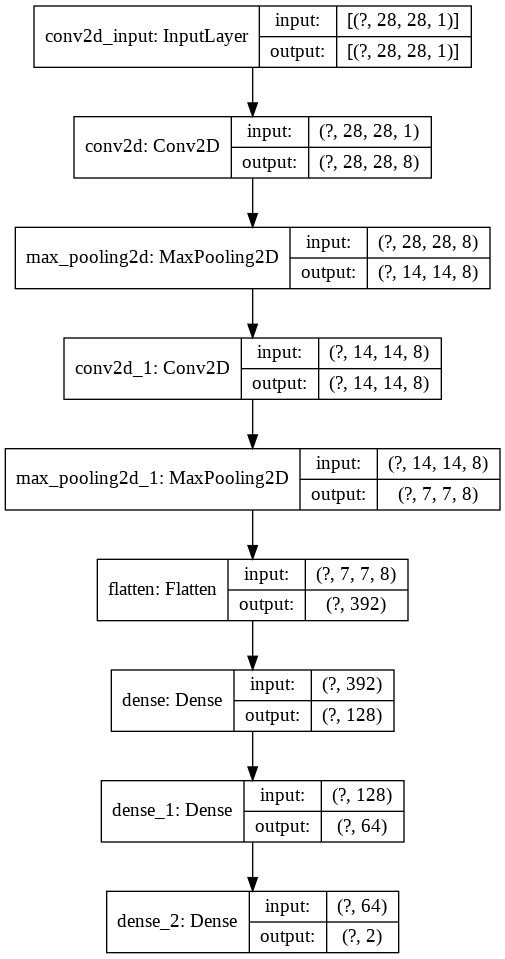

In [0]:
enc.summary()
tf.keras.utils.plot_model(enc, 'enc.png', show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 392)               50568     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           264       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)        

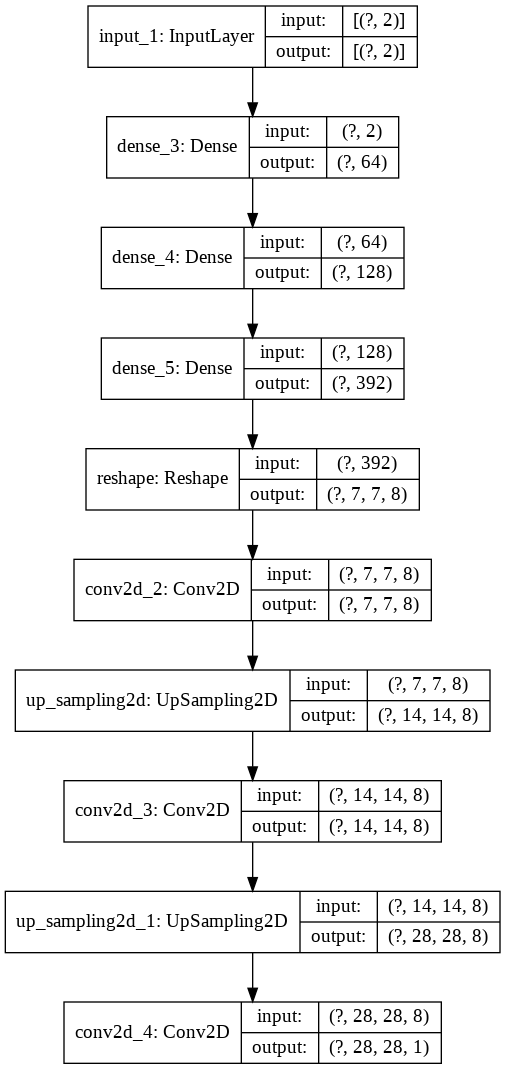

In [0]:
dec.summary()
tf.keras.utils.plot_model(dec, 'dec.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 58994     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         59641     
Total params: 118,635
Trainable params: 118,635
Non-trainable params: 0
_________________________________________________________________


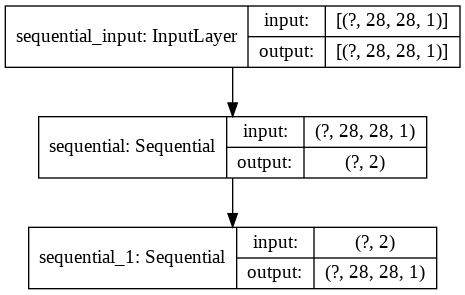

In [0]:
ae.summary()
tf.keras.utils.plot_model(ae, 'ae.png', show_shapes=True)

## 오토인코더 인스턴스 트레이닝

AutoEncoder 인스턴스 ae에 대한 훈련 수행
* 인스턴스 ae를 [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)
  + cf) shader program 컴파일과 유사하게 이해해도 됨
  + 이때, 훈련에 활용될 [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), [loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses), [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) 등을 지정함
  + Optmizer에 대한 이론적 내용은 [이곳](https://brunch.co.kr/@chris-song/50)을 참고하세요.
* 훈련 데이터 쌍 (train_images, train_labels)으로 fit()을 이용해 훈련 

In [0]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0593 - mae: 0.1298
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0464 - mae: 0.1062
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0437 - mae: 0.1012
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - mae: 0.0988
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - mae: 0.0969
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0407 - mae: 0.0956
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0402 - mae: 0.0946
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0397 - mae: 0.0937
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - mae: 0.0930
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0390 - mae: 0.0924


트레이닝 이후 ae 함수를 다시 수행

In [0]:
y_pred = ae(train_images)

In [0]:
import ipywidgets as widgets

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx,:,:,0])
  plt.subplot(122)
  plt.imshow(y_pred[idx,:,:,0])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=59999), Output()), _d…

## 인코더 / 디코더 모델을 각각 따로 함수로서 활용하기
다음과 같은 방법으로 트레이닝이 끝난 오토인코더의 enc와 dec를 각각 수행할 수 있다.

In [0]:
z = enc(train_images)
y_pred = dec(z)

## 인코딩 결과 확인 및 디코딩 결과 확인
* 특정 이미지에 대한 인코딩 결과를 확인한다.
* 인코딩 결과와 유사한 좌표값을 디코딩에 보내도 유사한 결과가 나옴을 확인한다.

In [0]:
import ipywidgets as widgets

def z_show(idx):
  print(z[idx])
  print('GT label:', train_labels[idx])

widgets.interact(z_show, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1));

interactive(children=(IntSlider(value=0, description='idx', max=59999), Output()), _dom_classes=('widget-inter…

인코딩 결과와 유사한 좌표값을 디코딩에 보내도 유사한 결과가 나옴을 확인

In [0]:
import ipywidgets as widgets

u=widgets.FloatSlider(min=-5.0, max=5.0)
v=widgets.FloatSlider(min=-5.0, max=5.0)

ui = widgets.HBox([u,v])

def z_test(u, v):
  z_test = np.array([[u,v]])  
  print(z_test)

  img_gen = dec(z_test)
  plt.imshow(img_gen[0,:,:,0])
  plt.show()  

out = widgets.interactive_output(z_test, {'u': u, 'v': v})

display(ui, out)

Output()

## 인코딩 결과 가시화
오토인코더의 encoder가 만들어 내는 representation인 z 값을 가시화 한다. 

In [0]:
# 로딩된 MNIST 데이터 가시화
import matplotlib.pyplot as plt

z_list = []
z_list[:] = []

for i in range(0,10):
  print("z_{} :".format(i), z[train_labels==i].shape)
  z_list.append(z[train_labels == i])

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for z, color in zip(z_list, colors):
  plt.scatter(z[:,0], z[:,1], color = color)


## 인코딩 결과 가시화를 통해 알 수 있는 점
오토인코더의 encoder가 만들어 내는 representation인 z 값을 가시화를 해본 결과 label별로 discriminative한 representation을 만들어내지 못하는 것을 알 수 있다.

## 디코더를 이용한 Generative Model 구성

In [0]:
z = np.array([[-1, 0.2], 
              [0.5, 0.5], 
              [5, -5]
             ])

result = dec(z)

print(z.shape)
print(result.shape)

(3, 2)
(3, 28, 28, 1)


결과 가시화
 + [-1, 0.2]는 숫자 8의 분포에 속한다.
 + [0.5, 0.5]는 숫자 6의 분포에 속한다.
 + [5, -5]는 숫자 0의 분포에 속한다.
* 하지만, 8을 보면 5와 8의 애매한 경계선에 있는 것 같다.
* 이를 통해, 분포가 겹치는 것을 확인할 수 있다.
* 이 때문에 condition을 주어 분포가 겹치지 않게 하는 conditional autoencoder가 나오게 되었다.

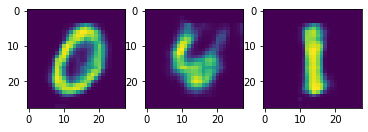

In [0]:
# 로딩된 MNIST 데이터 가시화
import matplotlib.pyplot as plt

plt.subplot(131)
plt.imshow(result[0,:,:,0])
plt.subplot(132)
plt.imshow(result[1,:,:,0])
plt.subplot(133)
plt.imshow(result[2,:,:,0])

## 차원 늘리기
n_dim을 2에서 7로 늘려본다.

In [0]:
n_dim = 7

## 인코딩 모델 정의

In [0]:
enc = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (2,2), activation='relu', padding='same', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2), padding='same'),
  tf.keras.layers.Conv2D(8, (2,2), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D((2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(n_dim)
])

## 디코딩 모델 정의

In [0]:
dec = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(n_dim,)),   # 주의: 반드시 1D tensor를 (ndim, )로 표현할 것
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(392, activation='relu'),
  tf.keras.layers.Reshape(target_shape=(7,7,8)),
  tf.keras.layers.Conv2D(8, (2,2), activation='relu', padding='same'),
  tf.keras.layers.UpSampling2D((2,2)),
  tf.keras.layers.Conv2D(8, (2,2), activation='relu', padding='same'),
  tf.keras.layers.UpSampling2D((2,2)),
  tf.keras.layers.Conv2D(1, (2,2), activation='sigmoid', padding='same'),
])

## AutoEncoder 정의

In [0]:
ae = tf.keras.models.Sequential([
  enc,
  dec,                               
])

## 네트워크 학습

In [0]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0443 - mae: 0.1027
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - mae: 0.0672
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - mae: 0.0620
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0225 - mae: 0.0592
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - mae: 0.0575
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0210 - mae: 0.0562
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0206 - mae: 0.0552
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0202 - mae: 0.0544
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0199 - mae: 0.0538
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - mae: 0.0533


## 학습된 결과 확인

In [0]:
y_pred = ae(train_images)

In [0]:
import ipywidgets as widgets

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx,:,:,0])
  plt.subplot(122)
  plt.imshow(y_pred[idx,:,:,0])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=59999), Output()), _d…

## 인코더 결과값 확인

In [0]:
z = enc(train_images)
y_pred = dec(z)

In [0]:
import ipywidgets as widgets

def z_show(idx):
  print(z[idx])
  print('GT label:', train_labels[idx])

widgets.interact(z_show, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1));

interactive(children=(IntSlider(value=0, description='idx', max=59999), Output()), _dom_classes=('widget-inter…

## TSNE를 통해 인코더 결과값(7,7,8) 분포 가시화
n_dim이 2일 때보다 좀 더 discriminative한 분포를 갖게 되었다.

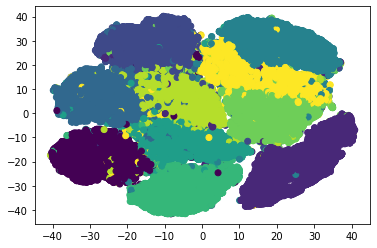

In [0]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(z)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=train_labels)

plt.show()
